In [1]:
import pandas as pd
import numpy as np
import io 
import statsmodels.api as sm

In [50]:
df = pd.read_excel("/content/Dr Mostafa (2).xlsx")

In [51]:
df.head(5)

,service row id,Nphiesclaimid,provider id,dob,age,gender,claim reference,claim occurence date,service type,nphies standard code,...,unit price,patient share,claimed amount,benefit code,policy number,length of stay [hospitalized],PrincipalDiagnosisCodeAm,PrincipalDiagnosisDesc,Practitioner License,Status
0,93477750,NCL0493546,CI,1993-05-16 00:00:00,29.746749,male,17477270,2022-09-27,MEDS,999999999,...,101.90,19.37,77.44,OT,35643497,9,K50.0,Crohns disease of small intestine,3500344182|,Invalid
1,93477751,NCL0493546,CI,1993-05-16 00:00:00,29.746749,male,17477270,2022-09-27,MEDS,999999999,...,87.95,16.71,66.84,OT,35643497,9,K50.0,Crohns disease of small intestine,3500344182|,Invalid
2,93477752,NCL0493546,CI,1993-05-16 00:00:00,29.746749,male,17477270,2022-09-20,MEDS,999999999,...,6.45,1.23,4.90,OT,35643497,9,K50.0,Crohns disease of small intestine,3500344182|,Invalid
3,93477664,NCL0493724,CI,1985-07-25 00:00:00,37.555099,male,17477258,2022-09-27,MEDS,99999-99-99,...,80.40,15.28,61.10,OT,35687070,0,K60.1,Chronic anal fissure,3500349636|,Accepted
4,93477665,NCL0493724,CI,1985-07-25 00:00:00,37.555099,male,17477258,2022-09-27,MEDS,99999-99-99,...,23.25,4.42,17.67,OT,35687070,0,K60.1,Chronic anal fissure,3500349636|,Accepted


In [52]:
pivot = pd.pivot_table(df, values = 'claimed amount ', index=['Nphiesclaimid'], columns = 'Status',aggfunc=np.sum).reset_index()

In [53]:
pivot

Status,Nphiesclaimid,Accepted,Invalid,Rejected
0,NCL0289409,NaN,65.28,NaN
1,NCL0289410,4.40,NaN,NaN
2,NCL0289414,39.16,NaN,31.50
3,NCL0289416,NaN,120.48,NaN
4,NCL0289420,23.01,NaN,54.18
...,...,...,...,...
28458,NCL0614455,0.00,NaN,0.00
28459,NCL0614457,NaN,0.00,NaN
28460,NCL0614491,NaN,0.00,NaN
28461,NCL0614494,0.00,NaN,0.00


In [54]:
raw_data = pivot.fillna(0)

In [55]:
dataset = raw_data.iloc[:,1:] 
#Note that now we are not making a distinction between input and target columns.

In [56]:
dataset

Status,Accepted,Invalid,Rejected
0,0.00,65.28,0.00
1,4.40,0.00,0.00
2,39.16,0.00,31.50
3,0.00,120.48,0.00
4,23.01,0.00,54.18
...,...,...,...
28458,0.00,0.00,0.00
28459,0.00,0.00,0.00
28460,0.00,0.00,0.00
28461,0.00,0.00,0.00


In [57]:
from sklearn import preprocessing 

# As mentioned in the introduction of this coding script,
# it is convential to import all libraries at the beginning of a script.
# Instead, we are putting it here, because that follows the sequence of explination of this lecture.

data_scaled = preprocessing.scale(dataset)
#Scaling our data will make it more suitable for machine learning.

In [58]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) 
principalComponents = pca.fit_transform(data_scaled)

#We are transforming our scaled input data to two principal components

In [59]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

#We create this Dataframe so we can add the PCA metrics to our original dataset.

,principal component 1,principal component 2
0,-0.054892,0.563942
1,-0.032313,-0.043194
2,0.554637,-0.041137
3,-0.056679,1.077389
4,0.785713,-0.040313
...,...,...
28458,-0.052779,-0.043264
28459,-0.052779,-0.043264
28460,-0.052779,-0.043264
28461,-0.052779,-0.043264


In [60]:
pca.explained_variance_ratio_

array([0.55172366, 0.33333069])

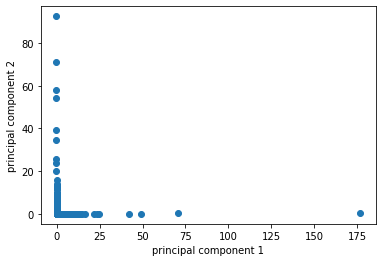

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline 
#If you are not using Google Colab, this line is not needed.
plt.scatter(principalComponents[:,0],principalComponents[:,1])
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

In [62]:
from sklearn.cluster import KMeans
kmeans = KMeans(4)
kmeans.fit(principalComponents)
clusters_new = principalDf.copy()
clusters_new['cluster_pred'] = kmeans.fit_predict(principalComponents)

Text(0, 0.5, 'principal component 2')

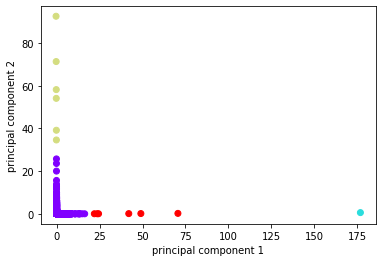

In [63]:
plt.scatter(clusters_new['principal component 1'],clusters_new['principal component 2'], c=clusters_new['cluster_pred']
,cmap='rainbow')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')

In [64]:
identified_clusters = kmeans.fit_predict(data_scaled) 
data_with_clusters = raw_data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters


Status,Nphiesclaimid,Accepted,Invalid,Rejected,Cluster
0,NCL0289409,0.00,65.28,0.00,0
1,NCL0289410,4.40,0.00,0.00,0
2,NCL0289414,39.16,0.00,31.50,0
3,NCL0289416,0.00,120.48,0.00,0
4,NCL0289420,23.01,0.00,54.18,0
...,...,...,...,...,...
28458,NCL0614455,0.00,0.00,0.00,0
28459,NCL0614457,0.00,0.00,0.00,0
28460,NCL0614491,0.00,0.00,0.00,0
28461,NCL0614494,0.00,0.00,0.00,0


In [65]:
X_dist = kmeans.transform(data_scaled)**2
alldistances = kmeans.fit_transform(data_scaled)
totalDistance = np.min(alldistances, axis=1).round(2)
data_with_distance = data_with_clusters.copy()
data_with_distance['Distance_from_nearest_cluster'] = totalDistance
data_with_distance

Status,Nphiesclaimid,Accepted,Invalid,Rejected,Cluster,Distance_from_nearest_cluster
0,NCL0289409,0.00,65.28,0.00,0,0.58
1,NCL0289410,4.40,0.00,0.00,0,0.04
2,NCL0289414,39.16,0.00,31.50,0,0.62
3,NCL0289416,0.00,120.48,0.00,0,1.09
4,NCL0289420,23.01,0.00,54.18,0,1.02
...,...,...,...,...,...,...
28458,NCL0614455,0.00,0.00,0.00,0,0.05
28459,NCL0614457,0.00,0.00,0.00,0,0.05
28460,NCL0614491,0.00,0.00,0.00,0,0.05
28461,NCL0614494,0.00,0.00,0.00,0,0.05


In [66]:
PCA_kmeans = pd.concat([data_with_distance, principalDf], axis=1)
PCA_kmeans

,Nphiesclaimid,Accepted,Invalid,Rejected,Cluster,Distance_from_nearest_cluster,principal component 1,principal component 2
0,NCL0289409,0.00,65.28,0.00,0,0.58,-0.054892,0.563942
1,NCL0289410,4.40,0.00,0.00,0,0.04,-0.032313,-0.043194
2,NCL0289414,39.16,0.00,31.50,0,0.62,0.554637,-0.041137
3,NCL0289416,0.00,120.48,0.00,0,1.09,-0.056679,1.077389
4,NCL0289420,23.01,0.00,54.18,0,1.02,0.785713,-0.040313
...,...,...,...,...,...,...,...,...
28458,NCL0614455,0.00,0.00,0.00,0,0.05,-0.052779,-0.043264
28459,NCL0614457,0.00,0.00,0.00,0,0.05,-0.052779,-0.043264
28460,NCL0614491,0.00,0.00,0.00,0,0.05,-0.052779,-0.043264
28461,NCL0614494,0.00,0.00,0.00,0,0.05,-0.052779,-0.043264


In [67]:
PCA_kmeans.columns

Index(['Nphiesclaimid', 'Accepted', 'Invalid', 'Rejected', 'Cluster',
       'Distance_from_nearest_cluster', 'principal component 1',
       'principal component 2'],
      dtype='object')

In [68]:
metrics_extracted = PCA_kmeans[['Nphiesclaimid','Cluster', 'Distance_from_nearest_cluster', 'principal component 1',
       'principal component 2' ]]
metrics_extracted

,Nphiesclaimid,Cluster,Distance_from_nearest_cluster,principal component 1,principal component 2
0,NCL0289409,0,0.58,-0.054892,0.563942
1,NCL0289410,0,0.04,-0.032313,-0.043194
2,NCL0289414,0,0.62,0.554637,-0.041137
3,NCL0289416,0,1.09,-0.056679,1.077389
4,NCL0289420,0,1.02,0.785713,-0.040313
...,...,...,...,...,...
28458,NCL0614455,0,0.05,-0.052779,-0.043264
28459,NCL0614457,0,0.05,-0.052779,-0.043264
28460,NCL0614491,0,0.05,-0.052779,-0.043264
28461,NCL0614494,0,0.05,-0.052779,-0.043264


In [69]:
Final_data = pd.merge(df, metrics_extracted, on= 'Nphiesclaimid')
Final_data 


,service row id,Nphiesclaimid,provider id,dob,age,gender,claim reference,claim occurence date,service type,nphies standard code,...,policy number,length of stay [hospitalized],PrincipalDiagnosisCodeAm,PrincipalDiagnosisDesc,Practitioner License,Status,Cluster,Distance_from_nearest_cluster,principal component 1,principal component 2
0,93477750,NCL0493546,CI,1993-05-16 00:00:00,29.746749,male,17477270,2022-09-27,MEDS,999999999,...,35643497,9,K50.0,Crohns disease of small intestine,3500344182|,Invalid,0,1.65,-0.058644,1.641994
1,93477751,NCL0493546,CI,1993-05-16 00:00:00,29.746749,male,17477270,2022-09-27,MEDS,999999999,...,35643497,9,K50.0,Crohns disease of small intestine,3500344182|,Invalid,0,1.65,-0.058644,1.641994
2,93477752,NCL0493546,CI,1993-05-16 00:00:00,29.746749,male,17477270,2022-09-20,MEDS,999999999,...,35643497,9,K50.0,Crohns disease of small intestine,3500344182|,Invalid,0,1.65,-0.058644,1.641994
3,93477753,NCL0493546,CI,1993-05-16 00:00:00,29.746749,male,17477270,2022-09-18,CONS,836000010,...,35643497,9,K50.0,Crohns disease of small intestine,3500344182|,Invalid,0,1.65,-0.058644,1.641994
4,93477664,NCL0493724,CI,1985-07-25 00:00:00,37.555099,male,17477258,2022-09-27,MEDS,99999-99-99,...,35687070,0,K60.1,Chronic anal fissure,3500349636|,Accepted,0,0.70,0.462448,-0.041497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152312,94379820,NCL0614655,TU,1987-12-14 00:00:00,35.167693,female,17654228,2022-10-24,LBRD,73050-29-90,...,61368194,7,E22.1,Hyperprolactinaemia,19138323|,Accepted,0,0.05,-0.052779,-0.043264
152313,94938805,NCL0614494,AS,1989-11-04 00:00:00,33.275838,male,17769512,2022-10-31,CONS,83700-00-00,...,51121975,0,E11.65,Type 2 diabetes mellitus with poor control,IM20C|,Accepted,0,0.05,-0.052779,-0.043264
152314,94938806,NCL0614494,AS,1989-11-04 00:00:00,33.275838,male,17769512,2022-10-31,LBRD,73100-27-60,...,51121975,0,E11.65,Type 2 diabetes mellitus with poor control,IM20C|,Rejected,0,0.05,-0.052779,-0.043264
152315,94938807,NCL0614494,AS,1989-11-04 00:00:00,33.275838,male,17769512,2022-10-31,LBRD,73100-00-90,...,51121975,0,E11.65,Type 2 diabetes mellitus with poor control,IM20C|,Accepted,0,0.05,-0.052779,-0.043264


In [71]:
from google.colab import files
Final_data.to_excel('fortableau_by status.xlsx') 


In [ ]:
files.download('fortableau_by diagnosis.xlsx.xlsx')